# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
!pip install requests

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Desktop/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

SyntaxError: invalid syntax (citipy.py, line 7)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

NameError: name 'lat_range' is not defined

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#getweatherdata

city_list=[]
lat = []
long = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


rcd = 0
sets = 1
city_weather = []

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

In [7]:
#Print Beginning Log Statement

print(
    f'Beginning Data Retrieval\n'     
f'-----------------------------')

for city in cities:
    
    try: 
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json() 
        print(f'Processing Record {rcd} of Set {sets} | {city}')
        lat.append(json_response['coord']['lat'])
        long.append(json_response["coord"]["lon"])
        temp.append(json_response['main']['temp'])
        max_temp.append(json_response['main']['temp_max'])
        wind_speed.append(json_response['wind']['speed'])
        humidity.append(json_response['main']['humidity'])
        cloudiness.append(json_response['clouds']['all'])
        wind_speed.append(json_response['wind']['speed'])
        country.append(json_response['sys']['country'])
        date.append(json_response["dt"])
        rcd += 1

        if rcd == 50:
            rcd = 0
            sets += 1 
            
# If an error is experienced, skip the city
    except: (ValueError,IOError) 
    print("City not found. Skipping...") 
    pass
    
    continue
    
# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-----------------------------
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dataframe = {
    "City": cities, 
    "Lat": lat,
    "Lng": long, 
    "Temp": temp,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country
}

weather_data = pd.DataFrame(weather_dataframe)

In [9]:
#Windows desktop path
weather_data.to_csv("cities.csv", index = False)
weather_data

,City,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [10]:
len(cities), len(lat), len(long), len(temp), len(max_temp), len(humidity), len(cloudiness), len(wind_speed), len(country)

(0, 0, 0, 0, 0, 0, 0, 0, 0)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
badHumidityDF = weather_data[(weather_data['Humidity'] > 100)]
badHumidityDF

,City,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [12]:
#  Get the indices of cities that have humidity over 100%.
badHumidityDF.index

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
clean_city_data = weather_data.drop(weather_data[weather_data['Humidity'] < 15].index, inplace = False)
clean_city_data

,City,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [15]:
# Extract relevant fields from the data frame
City_Data = weather_data['City','Country', 'Latitude', 'Temperature', 'Humidity', 'Cloudiness', 'Windspeed', 'Date']

# Export the City_Data into a csv
#Windows path
City_Data.to_csv(r'../Desktop/City_Data.csv', index = False)
City_Data.head()

KeyError: ('City', 'Country', 'Latitude', 'Temperature', 'Humidity', 'Cloudiness', 'Windspeed', 'Date')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

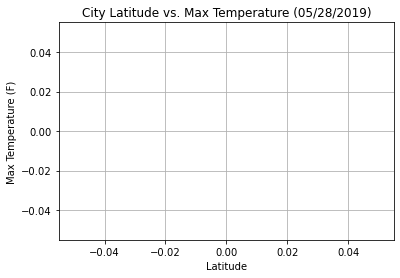

In [42]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/28/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('MaxTempPerLat.png')

# Show plot
plt.show()

## Latitude vs. Humidity Plot

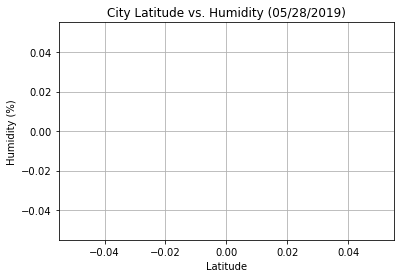

In [43]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/28/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('HumidityPerLat.png')

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

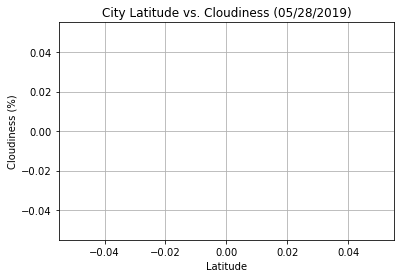

In [44]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (05/28/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('CloudinessPerLat.png')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

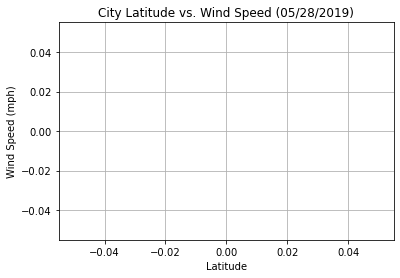

In [45]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (05/28/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('WindSpeedPerLat.png')

# Show plot
plt.show()

## Linear Regression

In [60]:
#Seperate plots into Northern hemisphere (greater than or equal to 0 degrees latitdue) and Southern hemisphere (less than 0 degrees latitude)
southern_df = clean_city_data.drop(clean_city_data[clean_city_data['Lat'] >= 0].index, inplace = False)
northern_df = clean_city_data.drop(clean_city_data[clean_city_data['Lat'] < 0].index, inplace = False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

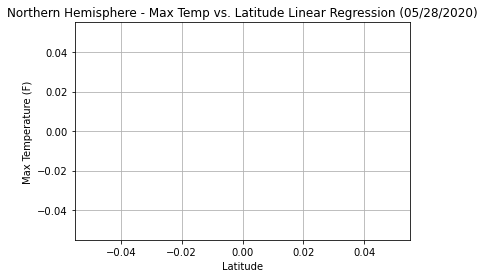

In [63]:
# Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (05/28/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Max Temp"])

#LinReg and plot line 
test1_df = northern_df["Lat"]
test2_df = northern_df["Max Temp"]

model = st.linregress(test1_df,test2_df)
y_values = test1_df*model[0]+model[1]
plt.plot(test1_df, y_values, color ='r')

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('NorthernMaxTempPerLat.png')

#show figure
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

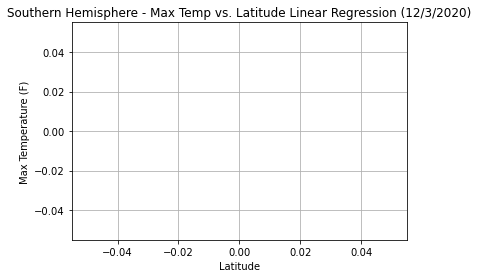

In [62]:
 # Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (05/28/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Max Temp"])

#LinReg and plot line 
test3_df = southern_df["Lat"]
test4_df = southern_df["Max Temp"]

model = st.linregress(test3_df,test4_df)
y_values = test3_df*model[0]+model[1]
plt.plot(test3_df, y_values, color ='r')

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('SouthernMaxTempPerLat.png')

# Show plot
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

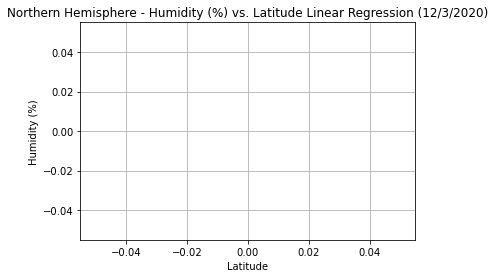

In [64]:
# Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (05/28/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Humidity"])

#LinReg and plot line 
test5_df = northern_df["Lat"]
test6_df = northern_df["Humidity"]

model = st.linregress(test5_df,test6_df)
y_values = test5_df*model[0]+model[1]
plt.plot(test1_df, y_values, color ='r')

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('NorthernHumidityPerLat.png')

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

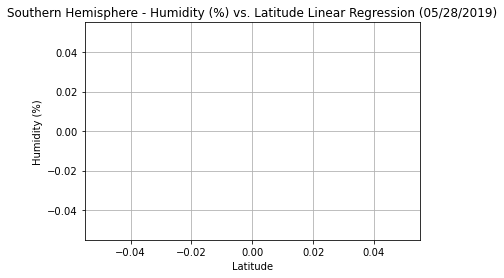

In [65]:
 # Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (05/28/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Humidity"])

#LinReg and plot line 
test7_df = southern_df["Lat"]
test8_df = southern_df["Humidity"]

model = st.linregress(test7_df,test8_df)
y_values = test7_df*model[0]+model[1]
plt.plot(test7_df, y_values, color ='r')

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('SouthernHumidityPerLat.png')

# Show plot
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

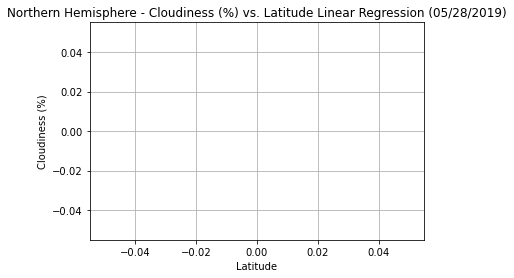

In [66]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (05/28/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#LinReg and plot line 
test9_df = northern_df["Lat"]
test10_df = northern_df["Cloudiness"]

model = st.linregress(test9_df,test10_df)
y_values = test9_df*model[0]+model[1]
plt.plot(test9_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Cloudiness"])

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('NorthernCloudinessPerLat.png')

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

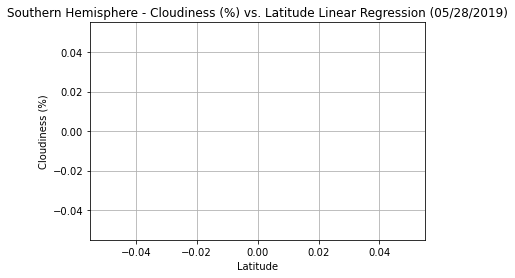

In [67]:
# Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (05/28/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#LinReg and plot line 
test11_df = southern_df["Lat"]
test12_df = southern_df["Cloudiness"]

model = st.linregress(test11_df,test12_df)
y_values = test11_df*model[0]+model[1]
plt.plot(test11_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Cloudiness"])

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('SouthernCloudinessPerLat.png')

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

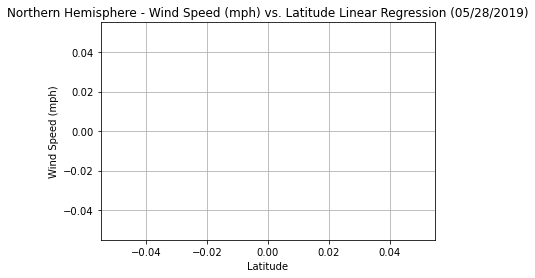

In [68]:
# Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (05/28/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


#LinReg and plot line 
test13_df = northern_df["Lat"]
test14_df = northern_df["Wind Speed"]

model = st.linregress(test13_df,test14_df)
y_values = test13_df*model[0]+model[1]
plt.plot(test13_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Wind Speed"])

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('NothernWindSpeedPerLat.png')

# Show plot
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

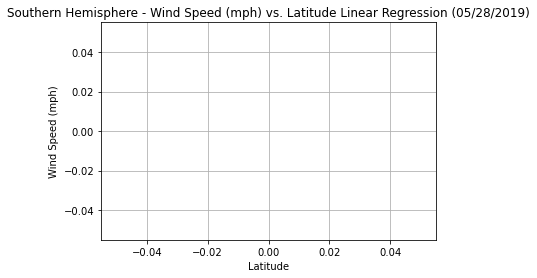

In [69]:
# Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (05/28/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


#LinReg and plot line 
test15_df = southern_df["Lat"]
test16_df = southern_df["Wind Speed"]

model = st.linregress(test15_df,test16_df)
y_values = test15_df*model[0]+model[1]
plt.plot(test15_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Wind Speed"])

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('SouthernWindSpeedPerLat.png')

# Show plot
plt.show()